<a href="https://colab.research.google.com/github/reply2vikas/2018-cycle-2/blob/master/P2S8_VK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rendering Gym Envs**

Here pyvirtualdisplay and store rgb frame array used while running environment. Environment frames animated using animation feature of matplotlib and HTML function used for Ipython display module. 

In [1]:
#installing dependencies
!apt-get -qq -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1 > /dev/null
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!pip -q install gym
!pip -q install pyglet
!pip -q install pyopengl
!pip -q install pyvirtualdisplay

E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'


In [2]:
import gym
import numpy as np
env = gym.make('SpaceInvaders-v0')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

obs = env.reset()
#env.render()
print('initial observation:', obs)

action = env.action_space.sample()
obs, r, done, info = env.step(action)
print('next observation:', obs)
print('reward:', r)
print('done:', done)
print('info:', info)

observation space: Box(210, 160, 3)
action space: Discrete(6)
initial observation: [[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[80 89 22]
  [80 89 22]
  [80 89 22]
  ...
  [80 89 22]
  [80 89 22]
  [80 89 22]]

 [[80 89 22]
  [80 89 22]
  [80 89 22]
  ...
  [80 89 22]
  [80 89 22]
  [80 89 22]]

 [[80 89 22]
  [80 89 22]
  [80 89 22]
  ...
  [80 89 22]
  [80 89 22]
  [80 89 22]]]
next observation: [[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[80 89 22]
  [80 89 22]
  [80 89 22]
  ...
  [80 89 22]
  [80 89 22]
  [80 89 22]]

 [[80 89 22]
  [80 89 22]
 

In [3]:
# Start virtual display
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


test episode: 0 R: 20.0
test episode: 1 R: 40.0
test episode: 2 R: 20.0


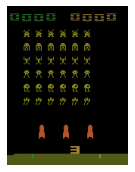

In [4]:
frames = []
for i in range(3):
    obs = env.reset()
    done = False
    R = 0
    t = 0
    while not done and t < 200:
        frames.append(env.render(mode = 'rgb_array'))
        obs, r, done, _ = env.step(env.action_space.sample())
        R += r
        t += 1
    print('test episode:', i, 'R:', R)
 
env.render()

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())

In [5]:
# wrap env for recording video
envw = gym.wrappers.Monitor(env, "./", force=True)

obs = envw.reset()
for i in range(3):
    done = False
    R = 0
    t = 0
    
    while not done and t < 200:
        envw.render()
        obs, r, done, _ = envw.step(env.action_space.sample())
        R += r
        t += 1
    
    print('test episode:', i, 'R:', R)
    

test episode: 0 R: 20.0
test episode: 1 R: 50.0
test episode: 2 R: 55.0


In [0]:
#saving video
from google.colab import files
import glob

for file in glob.glob("openaigym1.video.*.mp4"):
  files.download(file)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#remove video to free memory
!rm openaigym.video.*